PyTorch 연습

In [1]:
import torch

In [2]:
import numpy as np

In [3]:
nums = torch.arange(9)
nums

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
nums.shape

torch.Size([9])

In [5]:
type(nums)

torch.Tensor

In [6]:
nums.numpy()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [7]:
nums.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [8]:
nums.view(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [9]:
# 3,3 모양으로 random 값
randoms = torch.rand((3,3))
randoms

tensor([[0.9457, 0.6432, 0.9100],
        [0.2140, 0.3490, 0.7602],
        [0.0713, 0.8028, 0.4006]])

In [10]:
zeros = torch.zeros((3,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [11]:
ones = torch.ones((3,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [12]:
# ones와 같은 모양으로 만듬
torch.zeros_like(ones)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [13]:
nums * 3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [14]:
nums = nums.reshape((3,3))
nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [15]:
nums + nums

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

In [16]:
result = torch.add(nums, 10)
result

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [17]:
result.numpy()

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [18]:
range_nums = torch.arange(9).reshape(3,3)
range_nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [19]:
range_nums.view(1, 9)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [20]:
# -1로 차원 줄이기
range_nums.view(-1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [21]:
nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [22]:
nums[1]

tensor([3, 4, 5])

In [23]:
nums[1, 1]

tensor(4)

In [24]:
nums[1:, 1:]

tensor([[4, 5],
        [7, 8]])

In [25]:
nums[1:]

tensor([[3, 4, 5],
        [6, 7, 8]])

In [26]:
arr = np.array([1,1,1])
arr

array([1, 1, 1])

In [27]:
# numpy -> torch
arr_torch = torch.from_numpy(arr)
arr_torch

tensor([1, 1, 1])

In [28]:
arr_torch.float()

tensor([1., 1., 1.])

In [29]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [30]:
arr_torch.to(device)

tensor([1, 1, 1], device='cuda:0')

In [31]:
arr_torch.to('cpu')

tensor([1, 1, 1])

In [32]:
from torchvision import datasets, transforms

In [33]:
batch_size = 32
test_batch_size = 32

In [35]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download = True, 
                   transform = transforms.Compose([
                                                    transforms.ToTensor(),
                                                    transforms.Normalize(mean=(0.5,), std = (0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle = True
)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw


  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [101]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=False, download = True, 
                   transform = transforms.Compose([
                                                    transforms.ToTensor(),
                                                    transforms.Normalize(mean=(0.5,), std = (0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle = True
)

In [37]:
images, labels = next(iter(train_loader))

In [38]:
images.shape

torch.Size([32, 1, 28, 28])

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
images[0].shape

torch.Size([1, 28, 28])

In [41]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [42]:
image = torch_image.numpy()
image.shape

(28, 28)

In [43]:
label = labels[0].numpy()

In [44]:
label

array(1)

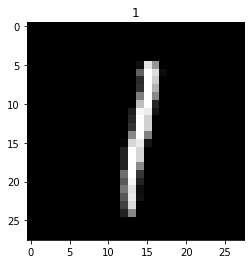

In [45]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()

In [46]:
import torch.nn as nn
import torch.nn.functional as F

In [47]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [48]:
layer = nn.Conv2d(1, 20, 5, 1).to(device)
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [49]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [50]:
weight = weight.cpu().detach().numpy()
weight.shape

(20, 1, 5, 5)

In [51]:
weight[0, 0, :, :]

array([[-0.13424222,  0.1236238 , -0.17755993,  0.10382917, -0.01801887],
       [-0.18648688,  0.00603359, -0.09729364, -0.02800279,  0.06772576],
       [ 0.1329813 , -0.09570646, -0.01798415,  0.06178427, -0.01368861],
       [-0.19231685, -0.01926157, -0.02688642, -0.06617854, -0.12720113],
       [-0.01418538, -0.08333266,  0.05839637,  0.04774947,  0.04528825]],
      dtype=float32)

In [52]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

In [53]:
light_jet = cmap_map(lambda x: x/2 + 0.5, matplotlib.cm.jet)

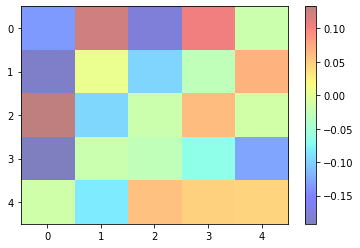

In [54]:
plt.imshow(weight[0, 0, :, :], cmap=light_jet, aspect='auto')
plt.colorbar()
plt.show()

In [55]:
image.shape

(28, 28)

In [56]:
output_data = layer(images.to(device))

In [57]:
output_data = output_data.data

In [58]:
output_data.shape

torch.Size([32, 20, 24, 24])

In [59]:
output = output_data.cpu().numpy()

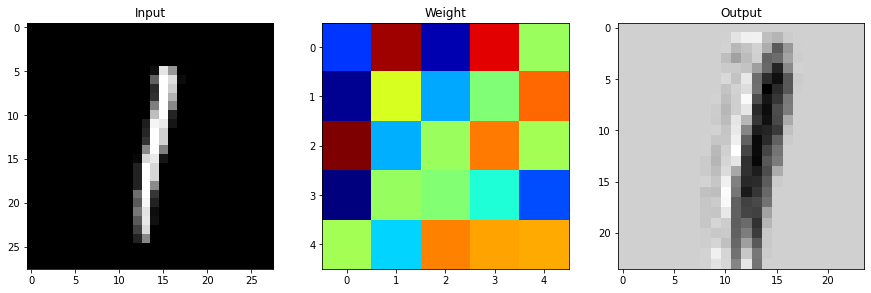

In [60]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output[0, 0, :, :], 'gray')
plt.show()

In [61]:
output_data.shape

torch.Size([32, 20, 24, 24])

In [62]:
pool = F.max_pool2d(output_data, 2, 2)
pool.shape

torch.Size([32, 20, 12, 12])

In [63]:
pool_arr = pool.cpu().numpy()
pool_arr.shape

(32, 20, 12, 12)

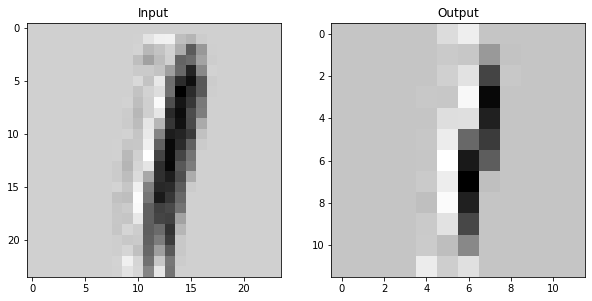

In [64]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('Input')
plt.imshow(output[0, 0, :, :], 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

In [65]:
flatten = pool.view(32, -1, 12 * 12)
flatten.shape

torch.Size([32, 20, 144])

In [66]:
lin = nn.Linear(144, 10).to(device)(flatten)
lin.shape

torch.Size([32, 20, 10])

In [67]:
final = lin[0, 0, :].unsqueeze(0)
final

tensor([[ 2.4188e-03, -6.2343e-05,  7.1373e-01,  2.5578e-01,  5.8781e-01,
         -7.7567e-01, -5.5913e-01, -6.2581e-01,  2.8274e-01, -5.1323e-01]],
       device='cuda:0', grad_fn=<UnsqueezeBackward0>)

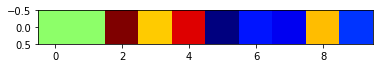

In [68]:
plt.imshow(final.cpu().detach().numpy(), 'jet')
plt.show()

In [69]:
images[0].shape

torch.Size([1, 28, 28])

In [70]:
with torch.no_grad():
    softmax = F.softmax(lin, dim=-1)

In [71]:
softmax[0, 0, :]

tensor([0.0943, 0.0941, 0.1921, 0.1215, 0.1694, 0.0433, 0.0538, 0.0503, 0.1248,
        0.0563], device='cuda:0')

In [72]:
np.sum(softmax[0, 0, :].cpu().numpy())

0.99999994

PyTorch 활용 학습

In [80]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(50*4*4, 500)
        self.fc2 = nn.Linear(500, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        
        x = x.view(-1, 50*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [81]:
model = Net()

In [82]:
model.forward(images)

tensor([[-2.3655, -2.2800, -2.3299, -2.2479, -2.3013, -2.2280, -2.2858, -2.2674,
         -2.3244, -2.4091],
        [-2.4071, -2.2405, -2.2969, -2.2447, -2.3424, -2.1908, -2.2481, -2.3005,
         -2.3634, -2.4172],
        [-2.3994, -2.2327, -2.3086, -2.2619, -2.3095, -2.2196, -2.2669, -2.2651,
         -2.3444, -2.4404],
        [-2.3953, -2.2539, -2.2857, -2.2230, -2.3231, -2.1922, -2.3266, -2.2714,
         -2.3644, -2.4142],
        [-2.3561, -2.2764, -2.3099, -2.2592, -2.3018, -2.2248, -2.2838, -2.2751,
         -2.3392, -2.4125],
        [-2.3602, -2.2811, -2.3135, -2.2507, -2.2983, -2.2323, -2.2774, -2.2691,
         -2.3435, -2.4132],
        [-2.3941, -2.2110, -2.2926, -2.2620, -2.3225, -2.2160, -2.3255, -2.2695,
         -2.3455, -2.4076],
        [-2.4403, -2.2785, -2.3144, -2.2454, -2.3223, -2.2072, -2.2636, -2.2382,
         -2.3487, -2.3910],
        [-2.4038, -2.2743, -2.3334, -2.2500, -2.3044, -2.2059, -2.2401, -2.2773,
         -2.3720, -2.3845],
        [-2.3570, -

In [84]:
model.to(device)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [85]:
import torch.optim as optim

In [86]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

In [89]:
data, target = next(iter(train_loader))

In [90]:
data.shape, target.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [91]:
data, target = data.to(device), target.to(device)

In [92]:
optimizer.zero_grad()

In [93]:
model.train()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [94]:
output = model(data)

In [95]:
loss = F.nll_loss(output, target)

In [96]:
loss.backward() # back propagation

In [97]:
optimizer.step()

In [98]:
epochs = 2
log_interval = 100

In [102]:
for epoch in range(1, epochs + 1):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), 
                100 * batch_idx / len(train_loader), loss.item()
            ))

    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 100 * correct / len(test_loader.dataset)
    ))


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.554352
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.592250
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.357361
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.322632
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.684900
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.317652
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.180118
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.414420
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.347676
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.335714
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.273676
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.485168
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.206992
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.257510
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.401722
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.216470
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.218293
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.238687
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.440007

Test set: Average Loss: 0.2256, Accuracy: 9350/10000 (94%)